# Student Information

In [53]:
# Name:                     Tianjie Chen
# Class:                    CSCI-5996
# Assignment No.:           2
# File Creation Time:       Sep/19/2025
# Last Edit Time:           Sep/19/2025
# Last Edit:                Tweaking learning rate
# Individual Completion:    Yes
# GenAI Used:               No

# Implementation Task

## Import Libraries

In [54]:
import random

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Data Generation

In [55]:
# Global parameters
size          = 100
ratio         = 0.2
epoch         = 3000

x_max         = 1.0
x_min         = -1.0

input_size    = 1
hidden_size   = 5
output_size   = 1
multiplier    = 5.0
lr            = 0.00541 # Numbers is too big starting from 0.01

In [56]:
# Target Function sin(2πx) + epsilon
def h(x):
  return np.sin(2 * np.pi * x) + np.random.normal(0, 0.1)

In [57]:
# Create input values
x = np.linspace(x_min, x_max, size)

In [58]:
# Create target values
y = np.empty(size)

for i, j in enumerate(x):
  y[i] = h(j)

In [59]:
# Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ratio, random_state=42)

In [60]:
# Reshape
x_train = x_train.reshape(-1, 1)
x_test  = x_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test  = y_test.reshape(-1, 1)

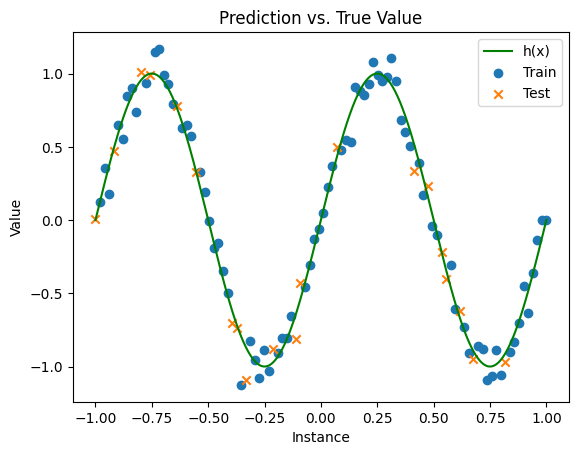

In [61]:
# Plot original data
sin_x = np.arange(-1, 1, 0.00001)
sin_y = np.sin(2 * np.pi * sin_x)

plt.plot(sin_x, sin_y, label = "h(x)", color = "green")
plt.scatter(x_train, y_train, marker = "o", label = "Train")
plt.scatter(x_test,  y_test , marker = "x", label = "Test")
plt.xlabel("Instance")
plt.ylabel("Value")
plt.title("Prediction vs. True Value")
plt.legend()
plt.show()

## Implement Neural Network

### Functions

In [62]:
def forward_pass(x, w, b):
  return np.dot(x, w) + b

In [63]:
def sigmoid_activation(x):
  return 1 / (1 + np.exp(-x))

In [64]:
def sum_square_error(y, t):
  return np.sum((y - t)**2) / 2

In [65]:
def error_derivative(y, t):
  return y - t

In [66]:
def sigmoid_derivative(x):
  return sigmoid_activation(x) * (1 - sigmoid_activation(x))

In [67]:
def NN_training(x, t, w0, w1, b0, b1, lr):
  # Forward propagation
  a = forward_pass(x, w0, b0)
  z = sigmoid_activation(a)
  y = forward_pass(z, w1, b1)

  # Calculate error
  err = sum_square_error(y, t)

  # Backward propagation
  for i in range(y.shape[0]):
    # Calculate Delta
    output_delta = error_derivative(y[i], t[i])
    hidden_delta = sigmoid_derivative(a[i]) * np.dot(w1, output_delta)

    # Perform gradient descend
    w1 -= lr * np.dot(z[i].reshape(-1, 1), output_delta.reshape(-1, 1)) # 5x1 * 1x1
    b1 -= lr * output_delta.reshape(-1, 1)
    w0 -= lr * np.dot(x[i].reshape(-1, 1), hidden_delta.reshape(1, -1)) # 1x1 * 1x5
    b0 -= lr * hidden_delta.reshape(1, -1)

  return err, w0, w1, b0, b1

In [68]:
def NN_predicting(x, w0, w1, b0, b1):
  # Forward propagation
  a0 = forward_pass(x, w0, b0)
  z  = sigmoid_activation(a0)
  y  = forward_pass(z, w1, b1)

  return y

### Processes

In [69]:
# Initialize weights and biases
w0, w1 = np.random.normal(0, multiplier, size=(input_size, hidden_size)), np.random.normal(0, multiplier, size=(hidden_size, output_size))
b0, b1 = np.ones((1, hidden_size)), np.ones((1, output_size))

# Train 3000 epoches
err_arr = []

for i in range(epoch):
  err, w0, w1, b0, b1 = NN_training(x_train, y_train, w0, w1, b0, b1, lr)
  err_arr.append(err)

print(f"Train Error: {err}")

Train Error: 2.8198842566096958


In [70]:
# Test loss
print(f"Test Error: {sum_square_error(NN_predicting(x_test, w0, w1, b0, b1), y_test)}")

Test Error: 0.7633541028139382


## Plotting

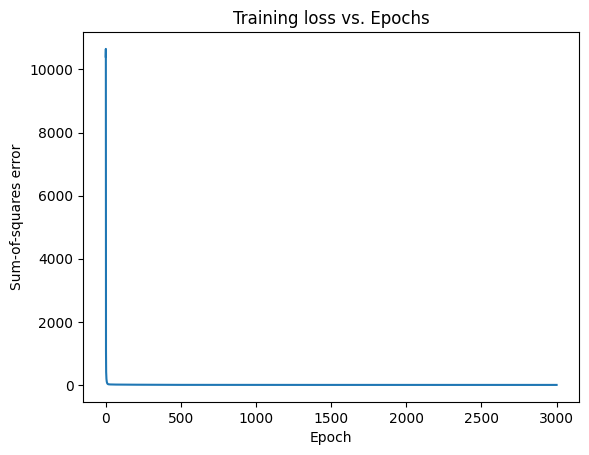

In [71]:
plt.plot(np.linspace(0, epoch, epoch), err_arr)
plt.xlabel("Epoch")
plt.ylabel("Sum-of-squares error")
plt.title("Training loss vs. Epochs")
plt.show()

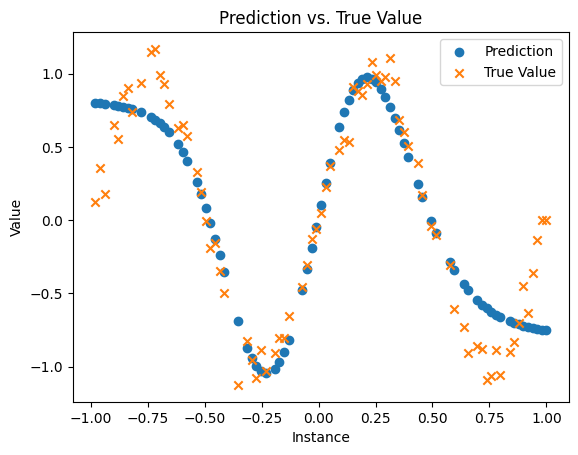

In [72]:
plt.scatter(x_train, NN_predicting(x_train, w0, w1, b0, b1), marker = "o", label = "Prediction")
plt.scatter(x_train, y_train                       , marker = "x", label = "True Value")
plt.xlabel("Instance")
plt.ylabel("Value")
plt.title("Prediction vs. True Value")
plt.legend()
plt.show()

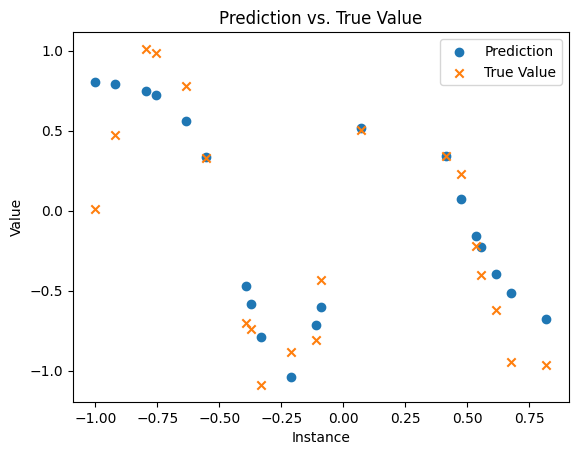

In [73]:
plt.scatter(x_test, NN_predicting(x_test, w0, w1, b0, b1), marker = "o", label = "Prediction")
plt.scatter(x_test, y_test                       , marker = "x", label = "True Value")
plt.xlabel("Instance")
plt.ylabel("Value")
plt.title("Prediction vs. True Value")
plt.legend()
plt.show()